## Generate Processed Files:
- Candidate Committees
- Candidate Committee Expenditures

In [1]:
from fec.processor import Processor

In [2]:
p1 = Processor(
    content_path='data/raw/operating_expenditures_20190502.txt',
    header_path='data/header/operating_expenditures_20190502.csv'
)

In [3]:
p1.generate_processed_file('data/processed/operating_expenditures_20190502.csv')

True

In [4]:
p2 = Processor(
    content_path='data/raw/committees_20190502.txt',
    header_path='data/header/committees_20190502.csv'
)

In [5]:
p2.generate_processed_file('data/processed/committees_20190502.csv')

True

## Load And Combine Files

In [6]:
import pandas as pd
import numpy as np

In [7]:
df1 = pd.read_csv('data/processed/operating_expenditures_20190502.csv', index_col=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df1.head(2)

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
0,C00270934,A,2019,M2,201902059145462248,21B,F3X,SB,"KARMIE, BROOKE",RAVENNA,...,PAYROLL,1.0,Administrative/Salary/Overhead Expenses,NaN,PAYROLL,IND,4021520191639656284,1314368,SB21B-EX11145,NaN
1,C00270934,A,2019,M2,201902059145462247,21B,F3X,SB,TIME WARNER CABLE,CAROL STREAM,...,PHONE INTERNET CABLE,1.0,Administrative/Salary/Overhead Expenses,NaN,PHONE INTERNET CABLE,ORG,4021520191639656274,1314368,SB21B-EX11137,NaN


In [9]:
df1.iloc[0]

CMTE_ID                                              C00270934
AMNDT_IND                                                    A
RPT_YR                                                    2019
RPT_TP                                                      M2
IMAGE_NUM                                   201902059145462248
LINE_NUM                                                   21B
FORM_TP_CD                                                 F3X
SCHED_TP_CD                                                 SB
NAME                                            KARMIE, BROOKE
CITY                                                   RAVENNA
STATE                                                       OH
ZIP_CODE                                                 44266
TRANSACTION_DT                                      01/30/2019
TRANSACTION_AMT                                        1073.72
TRANSACTION_PGI                                              G
PURPOSE                                                

In [10]:
df2 = pd.read_csv('data/processed/committees_20190502.csv', index_col=False)

In [11]:
df2.head(2)

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,SARAH MOE,2501 MCGEE,MD #500,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN MR.","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN


In [12]:
df2.iloc[0]

CMTE_ID                          C00000059
CMTE_NM                 HALLMARK CARDS PAC
TRES_NM                          SARAH MOE
CMTE_ST1                        2501 MCGEE
CMTE_ST2                           MD #500
CMTE_CITY                      KANSAS CITY
CMTE_ST                                 MO
CMTE_ZIP                             64108
CMTE_DSGN                                U
CMTE_TP                                  Q
CMTE_PTY_AFFILIATION                   UNK
CMTE_FILING_FREQ                         M
ORG_TP                                   C
CONNECTED_ORG_NM                       NaN
CAND_ID\n                              NaN
Name: 0, dtype: object

In [13]:
df = pd.merge(
    df1,
    df2[['CMTE_ID', 'CMTE_NM', 'TRES_NM', 'CMTE_CITY', 'CMTE_ST', 'CMTE_PTY_AFFILIATION']],
    on='CMTE_ID'
)

In [14]:
df.head(2)

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID,CMTE_NM,TRES_NM,CMTE_CITY,CMTE_ST,CMTE_PTY_AFFILIATION
0,C00270934,A,2019,M2,201902059145462248,21B,F3X,SB,"KARMIE, BROOKE",RAVENNA,...,IND,4021520191639656284,1314368,SB21B-EX11145,NaN,STARK COUNTY REPUBLICAN PARTY,"MEISMER, CINDY",CANTON,OH,REP
1,C00270934,A,2019,M2,201902059145462247,21B,F3X,SB,TIME WARNER CABLE,CAROL STREAM,...,ORG,4021520191639656274,1314368,SB21B-EX11137,NaN,STARK COUNTY REPUBLICAN PARTY,"MEISMER, CINDY",CANTON,OH,REP


In [15]:
df.iloc[0]

CMTE_ID                                                C00270934
AMNDT_IND                                                      A
RPT_YR                                                      2019
RPT_TP                                                        M2
IMAGE_NUM                                     201902059145462248
LINE_NUM                                                     21B
FORM_TP_CD                                                   F3X
SCHED_TP_CD                                                   SB
NAME                                              KARMIE, BROOKE
CITY                                                     RAVENNA
STATE                                                         OH
ZIP_CODE                                                   44266
TRANSACTION_DT                                        01/30/2019
TRANSACTION_AMT                                          1073.72
TRANSACTION_PGI                                                G
PURPOSE                  

## Analysis

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')

### Top 5 Party Affiliation by Number of Committees

In [17]:
pd.DataFrame(df['CMTE_PTY_AFFILIATION'].value_counts()[:5])

,CMTE_PTY_AFFILIATION
DEM,60495
REP,35319
DFL,790
LIB,526
UNK,520


### Top Spending Categories, DEM vs REP

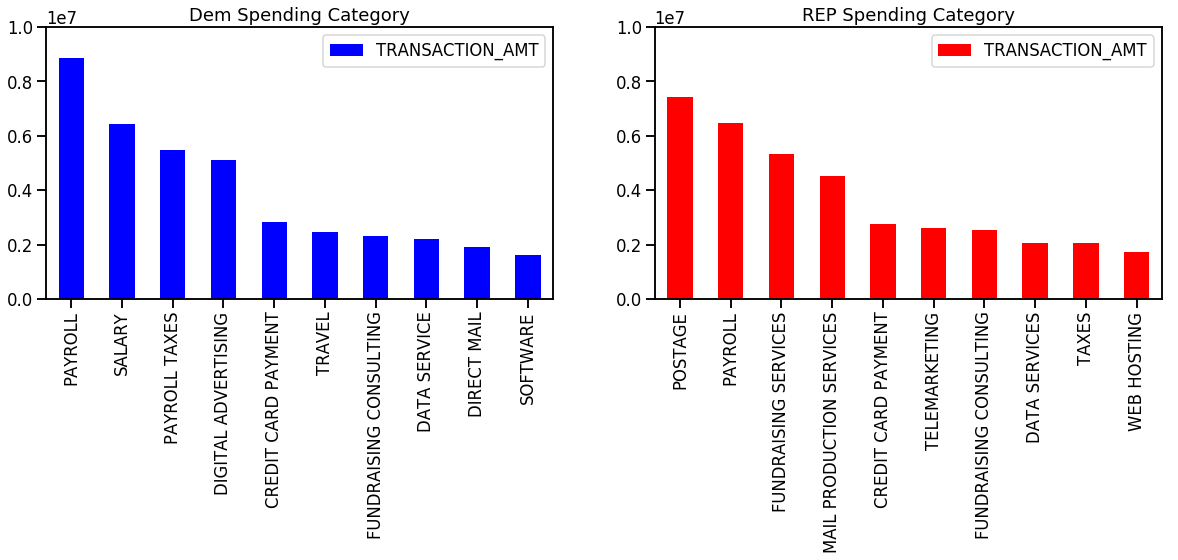

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

(
    df
    .loc[
        df['CMTE_PTY_AFFILIATION'].isin(['DEM', 'DFL'])
    ]
    .groupby('PURPOSE')
    .agg({'TRANSACTION_AMT': np.sum})
    .reset_index()
    .sort_values('TRANSACTION_AMT', ascending=False)
    .iloc[:10]
    .plot
    .bar(x='PURPOSE', y='TRANSACTION_AMT', ax=ax[0], color='b', title='Dem Spending Category')
)

(
    df
    .loc[
        df['CMTE_PTY_AFFILIATION'].isin(['REP'])
    ]
    .groupby('PURPOSE')
    .agg({'TRANSACTION_AMT': np.sum})
    .reset_index()
    .sort_values('TRANSACTION_AMT', ascending=False)
    .iloc[:10]
    .plot
    .bar(x='PURPOSE', y='TRANSACTION_AMT', ax=ax[1], color='r', title='REP Spending Category')
)

_ = ax[0].set_ylim([0, 10000000])
_ = ax[1].set_ylim([0, 10000000])
_ = ax[0].set_xlabel(None)
_ = ax[1].set_xlabel(None)

### Top Spending Category: Bernie Sanders vs Kamala Harris

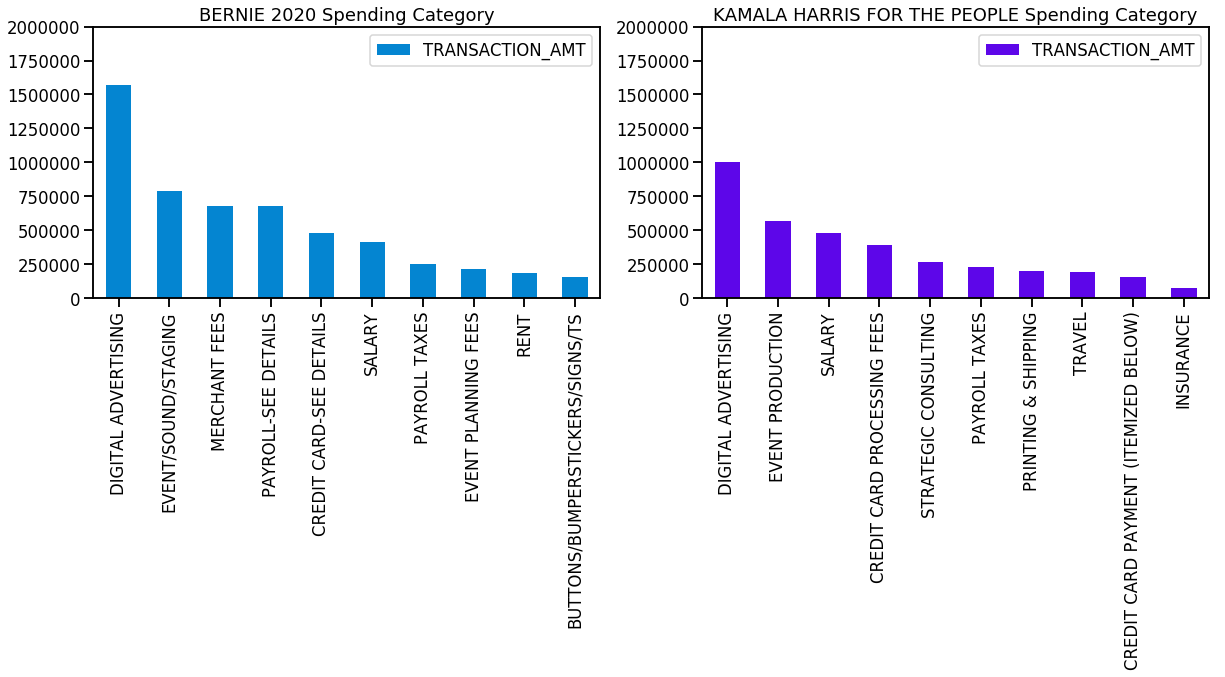

In [51]:
cand1 = 'BERNIE 2020'
cand2 = 'KAMALA HARRIS FOR THE PEOPLE'

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

(
    df
    .loc[
        df['CMTE_NM']==cand1
    ]
    .groupby('PURPOSE')
    .agg({'TRANSACTION_AMT': np.sum})
    .reset_index()
    .sort_values('TRANSACTION_AMT', ascending=False)
    .iloc[:10]
    .plot
    .bar(x='PURPOSE', y='TRANSACTION_AMT',
         ax=ax[0],
         color='xkcd:cerulean',
         title='{} Spending Category'.format(cand1))
)

(
    df
    .loc[
        df['CMTE_NM']==cand2
    ]
    .groupby('PURPOSE')
    .agg({'TRANSACTION_AMT': np.sum})
    .reset_index()
    .sort_values('TRANSACTION_AMT', ascending=False)
    .iloc[:10]
    .plot
    .bar(x='PURPOSE', y='TRANSACTION_AMT',
         ax=ax[1],
         color='xkcd:blue violet',
         title='{} Spending Category'.format(cand2))
)

_ = ax[0].set_ylim([0, 2000000])
_ = ax[1].set_ylim([0, 2000000])
_ = ax[0].set_xlabel(None)
_ = ax[1].set_xlabel(None)

### Distribution of Salary: Bernie Sanders vs Kamala Harris

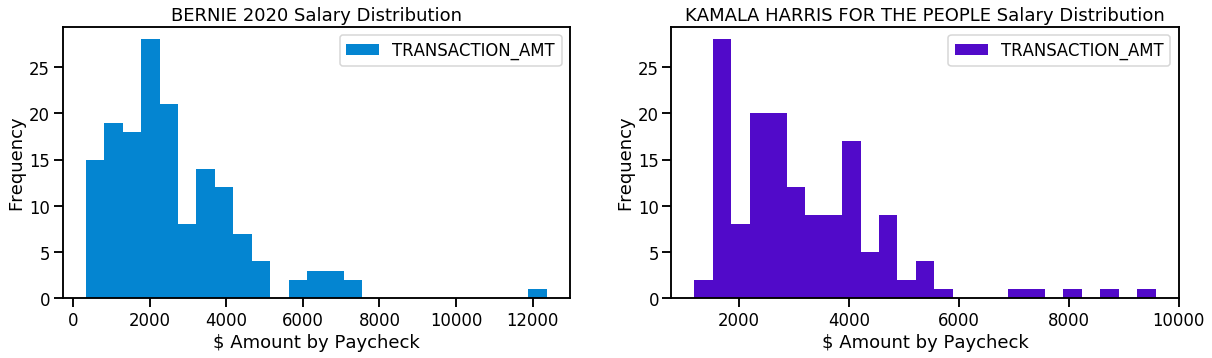

In [57]:
cand1 = 'BERNIE 2020'
cand2 = 'KAMALA HARRIS FOR THE PEOPLE'

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

(
    df
    .loc[
        (df['CMTE_NM']==cand1)
        & (df['PURPOSE']=='SALARY'),
        ['TRANSACTION_AMT']
    ]
    .plot
    .hist(
        bins=25, ax=ax[0],
        color='xkcd:cerulean',
        title='{} Salary Distribution'.format(cand1)
    )
)

(
    df
    .loc[
        (df['CMTE_NM']==cand2)
        & (df['PURPOSE']=='SALARY'),
        ['TRANSACTION_AMT']
    ]
    .plot
    .hist(
        bins=25, ax=ax[1],
        color='xkcd:violet blue',
        title='{} Salary Distribution'.format(cand2)
    )
)

_ = ax[0].set_xlabel('\$ Amount by Paycheck')
_ = ax[1].set_xlabel('\$ Amount by Paycheck')